# Dalle Runtime Example

Ensure you have everything set up as per README.md.

## Setup

Ensure you've created the `ldm` conda environment as outlined in the DALL-E documentation

## Run Server

> mlserver start docs/examples/.

## Send Request

In [24]:
import requests

data = {
    "inputs": [{
        "name": "text_inputs",
        "shape": [1],
        "datatype": "BYTES",
        "data": ["Cookies"]
    }],
    "parameters": { "seed": 3 }
}
result = requests.post("http://localhost:8080/v2/models/transformer/infer", json=data)

In [25]:
import json

result_json = json.loads(result.json()["outputs"][0]["data"][0])
result_str = result_json[0][0]["generated_text"]

result_str = result_str.replace("\n", " ")

print(result_str)

Cookies, and chocolate on the table. My friends are not allowed to get in with me, because then they take me up on being one of those people to spend the time with.   The truth is there's more value placed on


In [12]:
import requests

data = {
    "inputs": [{
        "name": "text_inputs",
        "shape": [1],
        "datatype": "BYTES",
        "data": [result_str]
    }],
    "parameters": { "seed": 3 }
}
result = requests.post("http://localhost:8080/v2/models/test-model/infer", json=data)

## Process Response

In [13]:
from mlserver.types import InferenceResponse

ir = InferenceResponse(**result.json())

## Decode Output

In [14]:
from mlserver.codecs import NumpyCodec

np_arr = NumpyCodec.decode_output(ir.outputs[0])

## Display Output

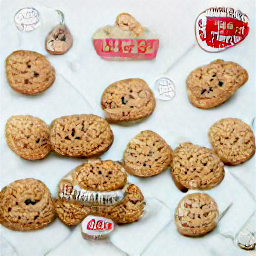

In [15]:
from PIL import Image

img_arr = Image.fromarray(np_arr, 'RGB')

display(img_arr)